
HEAD:


INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             201 non-null    object 
 1   age                201 non-null    float64
 2   hypertension       201 non-null    int64  
 3   heart_disease      201 non-null    int64  
 4   ever_married       201 non-null    object 
 5   work_type          201 non-null    object 
 6   Residence_type     201 non-null    object 
 7   avg_glucose_level  201 non-null    float64
 8   bmi                201 non-null    float64
 9   smoking_status     201 non-null    object 
 10  stroke             201 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 17.4+ KB
     gender    age  hypertension  heart_disease  ever_married  work_type  \
0     False  False         False          False         False      False   
1     False  False         False        

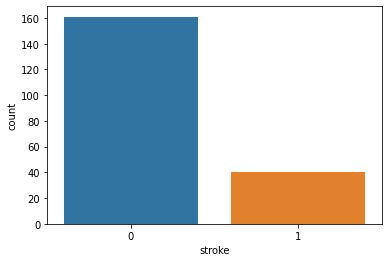

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/brai stroke dataset.csv')
print("\nHEAD:\n")
data.head(10)

print("\nINFO:\n")
data.info()
print(data.isna())
data.isnull().sum()
from sklearn.preprocessing import LabelEncoder 
enc = LabelEncoder()
gender=enc.fit_transform(data['gender'])
data['gender']=gender

ever_married=enc.fit_transform(data['ever_married'])
data['ever_married']=ever_married

work_type=enc.fit_transform(data['work_type'])
data['work_type']=work_type

Residence_type=enc.fit_transform(data['Residence_type'])
data['Residence_type']=Residence_type

smoking_status=enc.fit_transform(data['smoking_status'])
data['smoking_status']=smoking_status
data.head()
target='stroke'

x=data.loc[:, data.columns!=target] #all columns except stroke
y=data.loc[:, data.columns==target] #only stroke column

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
a=sns.countplot(x=target,data=data)
print(data[target].value_counts())
y_train[target].value_counts()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
LogisticRegression()
y_test_pred = logreg.predict(x_test)
#generate_model_report(y_test,y_test_pred)
Accuracy =  0.8
Precision =  0.8085106382978723
Recall =  0.7755102040816326
F1_score =  0.7916666666666665


x = data.iloc[:, data.columns!=target]
y = data.iloc[:, data.columns==target]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

logreg = LogisticRegression().fit(x_train,y_train)

y_test_pred=logreg.predict(x_test)
#generate_model_report(y_test,y_test_pred)
Accuracy =  0.8
Precision =  0.8085106382978723
Recall =  0.7755102040816326
F1_score =  0.7916666666666665
from sklearn.metrics import confusion_matrix
cmat=confusion_matrix(y_test,y_test_pred)
print(cmat)

     gender   age  hypertension  heart_disease ever_married      work_type  \
0    Female  61.0             0              0          Yes  Self-employed   
1    Female  59.0             0              0          Yes        Private   
2      Male  78.0             0              1          Yes        Private   
3      Male  57.0             0              1           No       Govt_job   
4      Male  58.0             0              0          Yes        Private   
..      ...   ...           ...            ...          ...            ...   
196    Male  41.0             0              0           No        Private   
197    Male  40.0             0              0          Yes        Private   
198  Female  45.0             1              0          Yes       Govt_job   
199    Male  40.0             0              0          Yes        Private   
200  Female  80.0             1              0          Yes        Private   

    Residence_type  avg_glucose_level        bmi   smoking_stat

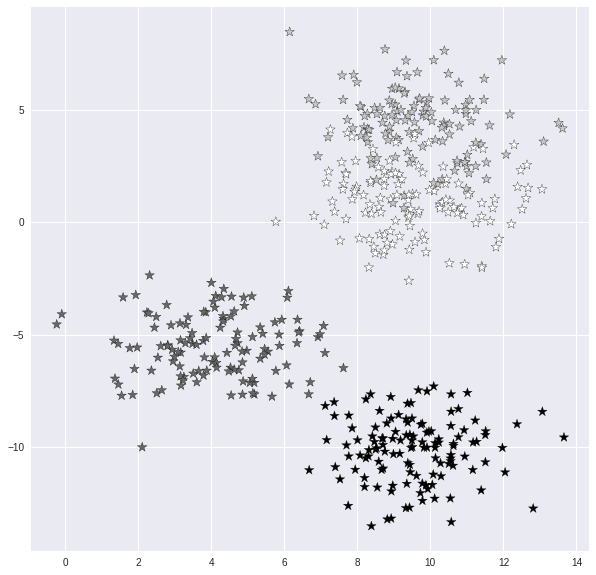

Accuracy with k=5 93.60000000000001
Accuracy with k=3 92.80000000000001


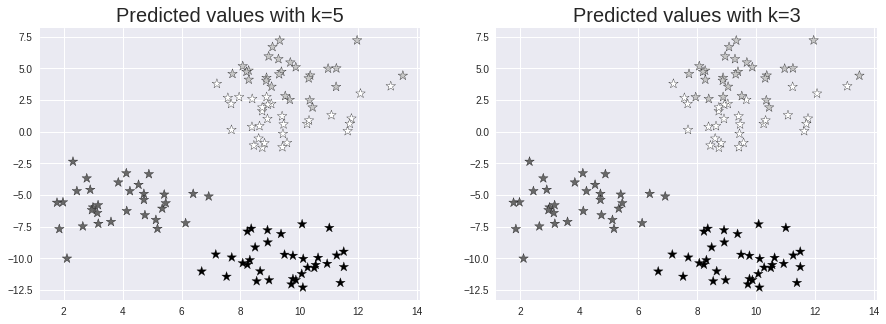

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data=pd.read_csv('/content/brai stroke dataset.csv')
print(data)
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 4,cluster_std = 1.5, random_state = 4)
plt.style.use('seaborn')
plt.figure(figsize = (10,10))
plt.scatter(X[:,0], X[:,1], c=y, marker= '*',s=100,edgecolors='black')
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5.fit(X_train, y_train)
knn3.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_3 = knn3.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_5, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=5", fontsize=20)

plt.subplot(1,2,2)
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred_3, marker= '*', s=100,edgecolors='black')
plt.title("Predicted values with k=3", fontsize=20)
plt.show()